In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as p
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD,Adam
from skimage import io
import cv2
import shutil
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import ConfusionMatrixDisplay
from keras.models import Model
from keras.applications.vgg16 import VGG16

from tensorflow.keras import applications
from numpy import save
from numpy import asarray
from numpy import savez_compressed
from numpy import load

savem='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/model/'
output='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/output/'

# 224+quick resize
output_1='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/output_1/'

In [40]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
# vgg16 = VGG16()
# vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
# inclus pas les couches Denses final, oblige input shape si false

# summarize the model
# vgg16.summary()


for layer in vgg16.layers:
    # print(layer)
    layer.trainable=False


model = Sequential()
# model.add(vgg16)
model.add(vgg16)
# model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(64, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))

# model.add(Dense(10, activation='softmax'))
model.add(Dense(20, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2048)              51382272  
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 20)                10260     
                                                                 
Total params: 71,352,660
Trainable params: 56,637,972
No

2022-03-10 02:38:25.342831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 02:38:25.351874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 02:38:25.352133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 02:38:25.352702: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [2]:
# example of loading the vgg16 model
# load model

# vgg16 = VGG16()
# vgg16 = VGG16(weights='imagenet', include_top=True)
vgg16 = VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))
# summarize the model
vgg16.summary()

2022-03-10 03:47:51.971984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 03:47:51.977223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 03:47:51.977546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 03:47:51.978404: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [2]:
# tf.keras.applications.resnet50.ResNet50(
#     include_top=True, weights='imagenet', input_tensor=None,
#     input_shape=None, pooling=None, classes=1000, **kwargs
# )

from keras.applications.resnet import ResNet50
from keras.applications.vgg19 import VGG19

# vgg16 = VGG16()
# vgg16 = VGG16(weights='imagenet', include_top=True)
# resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
# inclus pas les couches Denses final, oblige input shape si false

# summarize the model
# vgg16.summary()


for layer in vgg19.layers:
    # print(layer)
    layer.trainable=False


model = Sequential()
# model.add(vgg16)
model.add(vgg19)
# model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(64, activation='relu'))

model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
# model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))

# model.add(Dense(10, activation='softmax'))
model.add(Dense(20, activation='softmax'))
model.summary()

2022-03-10 07:26:18.471429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 07:26:18.475939: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 07:26:18.476205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-10 07:26:18.477038: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2048)              51382272  
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 20)                10260     
                                                                 
Total params: 76,662,356
Trainable params: 56,637,972
No

In [12]:
model = Sequential()
# VGG16
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.2)
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.2)

# model.add(Dropout(0.2)

model.add(Flatten())
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# model.add(Dense(32, activation='relu'))

# model.add(Dense(10, activation='softmax'))
model.add(Dense(20, activation='softmax'))


In [13]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_37 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_39 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [12]:

# model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
# model_import = Model(inputs=model_import.inputs, outputs=model.layers[-2].output)

vgg16 = Model(vgg16.input, vgg16.layers[-2].output)
vgg16.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

train 80% mask

In [2]:
classes=os.listdir(output)[0:10]
# classes=os.listdir(output)[0:20]
classes

['aidai',
 'anhu',
 'axin',
 'baibaihe',
 'baijingting',
 'baike',
 'baobeier',
 'baojianfeng',
 'benxi',
 'caiguoqing']

**penser a rogner AVANT de generer le masque** 

on regarde les size des images, en moyenne elle sont de format 140,146,3
avec ecarttype faible
on va donc convertir toute nos image en ce format.
on fait la convertion par rognement pour maintenir les bonnes proportions, de plus les images ont les face centré, donc le rognement ne risque pas de rogner le visage

upscale ou la downsclae en conservant les proportion en etant legerment au dessus de la taille voulu, puis apres le rogne


In [3]:
# classes=os.listdir(output)[0:100]
X = np.empty((0,3), int)
# cl=classes[0]
# cl=classes[1]



for cl in classes:
    for fichier in os.listdir(output+cl):
        # print(fichier)
        im=io.imread(output+cl+'/'+fichier)
        # X=np.array
        # plt.imshow(im)
        # X = np.append(X, np.asarray(im.shape), axis=0)
        X = np.append(X, [np.asarray(im.shape)], axis=0)
        # if k==100: break

In [7]:
print(f'x moyen {np.mean(X[:,0])}')
print(f'y moyen {np.mean(X[:,1])}')

x moyen 139.83678416321584
y moyen 145.75345924654076


voir la ration moyen est upsacle jusqu au plus grand

In [122]:
res=np.array([])
for li in X:
    # print(li[0]/li[1])
    # print((li[0]/li[1]).shape)
    res = np.append(res, [li[0]/li[1]], axis=0)
    # res = np.append(res, [1], axis=0)

In [127]:
res.shape

(9901,)

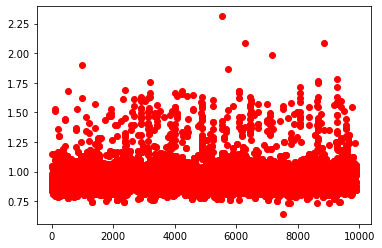

le ration median est x/y= 0.9459459459459459


In [134]:
x = list(range(0,len(res)))
y = res
plt.scatter(x, y, c = 'red')
plt.show()
print(f'le ration median est x/y= {np.median(res)}')
ratio_ideal=np.median(res)

In [138]:

# ratio=x_size,y_size
def get_delta(x,y):
    x_size=140
    y_size=146

    x_delta=x_size-x
    y_delta=y_size-y

    # print(y)
    print(x_delta,y_delta)


In [89]:
ratio=x_size/y_size
ratio

0.958904109589041

In [90]:
cl=classes[0]
stop=-1
for fichier in os.listdir(output+cl):
    stop+=1
    print(fichier)
    im=io.imread(output+cl+'/'+fichier)
    resize(im.shape[0], im.shape[1])
    if stop==0:break

001.jpg
-7 6


(134, 132, 3)
6 14
ration voulu 0.9459459459459459
ratio actuel 134/132 est 1.0151515151515151


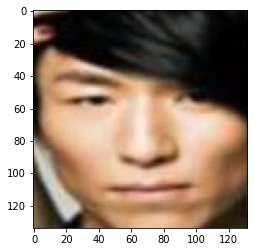

In [137]:
im=io.imread(output+cl+'/'+fichier)
plt.imshow(im)
print(im.shape)
get_delta(im.shape[0], im.shape[1])

# print(f'ration voulu {140/146}')
print(f'ration voulu {ratio_ideal}')
print(f'ratio actuel {im.shape[0]}/{im.shape[1]} est {im.shape[0]/im.shape[1]}')

In [139]:
x_ideal=256
y_ideal=256

get_delta(im.shape[0], im.shape[1])

6 14


In [174]:
fichier

'012.jpg'

In [106]:
def clean():
    # creation path
    if os.path.exists(output_1): shutil.rmtree(output_1)
    os.mkdir(output_1)

dim = (224, 224)
def traitement(cl,fichier):
    im=io.imread(output+cl+'/'+fichier)
    # resize image
    im2 = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    # im2=im2/((np.max(im2))-np.min(im2))

    # im2=im2/255

    cv2.imwrite(output_1+cl+'/'+fichier, cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))


In [107]:
clean()
for cl in classes:
    os.mkdir(output_1+cl)
    for fichier in os.listdir(output+cl):
        traitement(cl, fichier)

In [10]:

def affiche_2(source,im):
  fig=plt.figure ( figsize = (7 , 3))
  # fig.suptitle ( f'{r}')
  ax1=fig.add_subplot (121)
  ax1.axis ('off')
  ax1.imshow (source)

  ax2=fig.add_subplot (122)
  ax2.axis ('off')
  ax2.imshow (im)

In [13]:
output_1

'/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/output_1/'

# load pre traite 


In [232]:
# -----------------------------        chargement de X mask

X = np.empty((0,224,224,3), int)
y=np.array([],int)


# k=-1
for e,cl in enumerate(classes):
    for fichier in os.listdir(output_1+cl):
        if fichier[len(fichier)-8:-4] != 'mask': continue
        # k+=1
        # if k==2: break
        im=io.imread(output_1+cl+'/'+fichier)
        im=im/255
        X = np.append(X, [im], axis=0)
        y=np.append(y,[e],axis=0)
y=to_categorical(y, dtype ="uint8")

In [44]:
# -----------------------------        chargement de X sans mask


X = np.empty((0,224,224,3), int)
y=np.array([],int)


k=-1
for e,cl in enumerate(classes):
    for fichier in os.listdir(output_1+cl):
        if fichier[-5] == 'k': continue
        if fichier[0] == 'n': continue
        # print(fichier)
        k+=1

        # if k==2: break
        im=io.imread(output_1+cl+'/'+fichier)
        im=im/255
        X = np.append(X, [im], axis=0)
        y=np.append(y,[e],axis=0)
y=to_categorical(y, dtype ="uint8")    

# les plus gros classes

In [26]:
dim=(224,224)
X = np.empty((0,224,224,3), int)
target='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/ww/pins_Alex Lawther/Alex Lawther6_125.jpg'
im=io.imread(target)
im=im/255
im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
X = np.append(X, [im], axis=0)


In [34]:
classes=os.listdir('/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/ww')[:5]
classes

['pins_Adriana Lima',
 'pins_Alex Lawther',
 'pins_Alexandra Daddario',
 'pins_Alvaro Morte',
 'pins_alycia dabnem carey']

In [2]:
classes=[
    'liushishi',
    'zhangtianai',
    'liuyifei',
    'zhangxueying',
    'yangmi',
    'wangou',
    'liuqianhan',
    'caobingkun',
    'zhouxun',
    'zhaoliying'
]


# dataset 3
classes=[
    'pins_Adriana Lima',
    'pins_Alexandra Daddario',
    'pins_Alex Lawther',
    'pins_Alvaro Morte',
    'pins_alycia dabnem carey'
]

classes=os.listdir('/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/ww')
classes=os.listdir('/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/ww')[:20]
output='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/ww/'

dim=(224,224)
X = np.empty((0,224,224,3), int)
y=np.array([],int)

for e,cl in enumerate(classes):
    print(e)
    for fichier in os.listdir(output+cl):

        # pr dataset 2
        # if fichier[-5] == 'k': continue
        # if fichier[0] == 'n': continue

        
        im=io.imread(output+cl+'/'+fichier)
        im=im/255
        im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        X = np.append(X, [im], axis=0)
        # X = np.append(X, [np.asarray(im.shape)], axis=0)
        y=np.append(y,[e],axis=0)
y=to_categorical(y, dtype ="uint8")




save(savem+'X_binaire_20.npy', X)
save(savem+'y_binaire_20.npy', y)

# savez_compressed(savem+'X_comp.npz', X)
# savez_compressed(savem+'y_comp.npz', y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [21]:
# plt.imshow(X[500])
# plt.imshow(X[0])
# y.shape

# 7924 50
# 7924 224 224 3


# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
save('data.npy', data)


# load array
data = load('data.npy')
# print the array
print(data)




# define data
data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to npy file
savez_compressed('data.npz', data)



# load numpy array from npz file
# load dict of arrays
dict_data = load('data.npz')
# extract the first array
data = dict_data['arr_0']
# print the array
print(data)

[[0 1 2 3 4 5 6 7 8 9]]
[[0 1 2 3 4 5 6 7 8 9]]


In [25]:
X.dtype

dtype('float64')

In [72]:
model = Sequential()
# VGG16
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2)
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2)
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2)
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2)
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))



# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# hist=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=6, epochs=30, verbose=1)


# j'ai fait varier optimizer, mon nombre de classe, batch_sixe

# model.add(Dense(4096,activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(20, activation='softmax'))

SyntaxError: invalid syntax (662036805.py, line 7)

In [132]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_53 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_55 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [269]:
np.argmax(model.predict(np.array([x_train[260]])))

7

In [15]:
def scheduler(epoch , lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [166]:
# x_test.shape
# y_train.shape
# X.shape

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(312, 224, 224, 3)
(312,)
(154, 224, 224, 3)
(154,)


In [6]:
X=load(savem+'X_binaire_20.npy')
y=load(savem+'y_binaire_20.npy')

In [7]:
# vgg16 = VGG16(include_top=False, input_shape=(224,224,3))

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in vgg16.layers:
    layer.trainable=True

model = Sequential()
model.add(vgg16)
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
# model.add(Dense(, activation='relu'))

model.add(Dense(20, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_3 (Dense)             (None, 20)                20500     
                                                                 
Total params: 40,426,324
Trainable params: 40,426,324
Non-trainable params: 0
_________________________________________________________________


In [8]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# sgd=SGD(0.01)
# sgd=SGD(0.05)
sgd=SGD(0.0005)

# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 0.001
adam=Adam(learning_rate=0.001)
# adam=Adam(learning_rate=0.0003)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# callback=tf.keras.callbacks.LearningRateScheduler(scheduler)
# hist=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=16,callbacks=[callback], epochs=20, verbose=1)
hist=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=16, epochs=20, verbose=1)
# model.compile(loss='categorical_crossentropy', optimizer='opt', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# hist=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=32, epochs=10, verbose=1)
# hist=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=16, epochs=50, verbose=1)

# model.save(savem+'vgg16_tl_adam0003-2')

acc_test=hist.history['val_accuracy']
acc_train=hist.history['accuracy']
plt.plot(acc_test,color='green')
plt.plot(acc_train,color='red')
plt.show()

Epoch 1/20
  1/160 [..............................] - ETA: 1:38 - loss: 3.3699 - accuracy: 0.0625

2022-03-10 12:12:23.252524: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 229.50MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-03-10 12:12:23.252610: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 229.50MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


160/160 [==============================] - 43s 267ms/step - loss: 3.1107 - accuracy: 0.0590 - val_loss: 2.9785 - val_accuracy: 0.0828
Epoch 2/20


2022-03-10 12:13:15.860749: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 49.00MiB (rounded to 51380224)requested by op sequential_1/vgg16/block3_conv2/Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-03-10 12:13:15.860791: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-03-10 12:13:15.860803: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 82, Chunks in use: 80. 20.5KiB allocated for chunks. 20.0KiB in use in bin. 3.9KiB client-requested in use in bin.
2022-03-10 12:13:15.860811: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 12, Chunks in use: 12. 6.2KiB allocated for chunks. 6.2KiB in use in bin. 6.0KiB client-requested in use in bin.
202

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_1/vgg16/block3_conv2/Conv2D' defined at (most recent call last):
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 357, in dispatch_shell
      await result
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 359, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2768, in run_cell
      result = self._run_cell(
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2814, in _run_cell
      return runner(coro)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3012, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3251, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_361246/3112479226.py", line 20, in <module>
      hist=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=16, epochs=20, verbose=1)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
      return self._run_internal_graph(
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/layers/convolutional.py", line 248, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/xeowhyx/miniconda3/envs/tf/lib/python3.9/site-packages/keras/layers/convolutional.py", line 233, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_1/vgg16/block3_conv2/Conv2D'
OOM when allocating tensor with shape[16,256,56,56] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_1/vgg16/block3_conv2/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_4019]

In [20]:
# model.save(savem+'vgg16_tl_adam0003')
# model.save(savem+'vgg16p_tl_adam001_nature')
from tensorflow import keras
model=keras.models.load_model(savem+'vgg19p_tl_adam001')
# model=keras.models.load_model(savem+'vgg16_tl_adam0003')

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

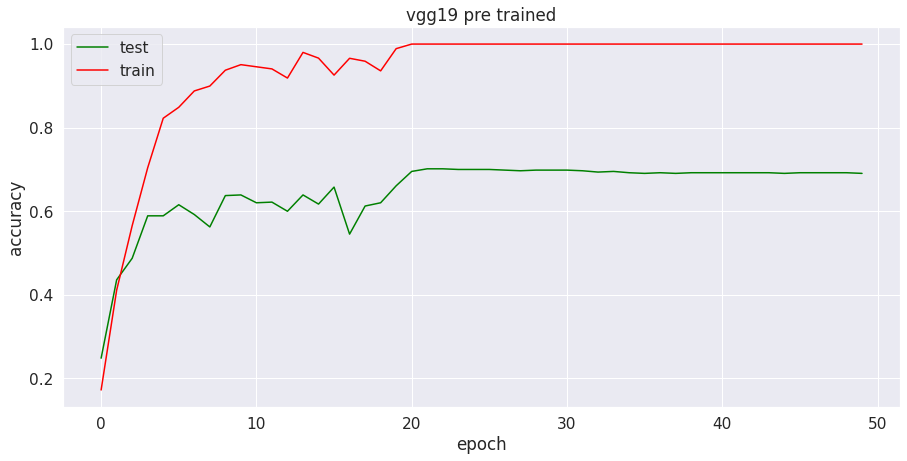

In [9]:
acc_test=hist.history['val_accuracy']
acc_train=hist.history['accuracy']


plt.figure(figsize=(15,7))
plt.plot(acc_test,color='green')
plt.plot(acc_train,color='red')
# plt.legend('pre trained vgg16')
plt.legend(['test','train'])
plt.title('vgg19 pre trained')
# plt.show()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('/home/xeowhyx/projet/vgg19_adam0001.png')


kjjk


In [22]:
y_pred = np.empty((0), int)
y_test_cat=np.empty((0), int)
y_train_cat=np.empty((0), int)

for i in range(0,y_test.shape[0]):
    y_pred=np.append(y_pred,np.argmax(model.predict(x_test[i].reshape(1,224,224,3))))
    y_test_cat=np.append(y_test_cat, np.argmax(y_test[i]))



Text(0.5, 34.5, 'label trouve')

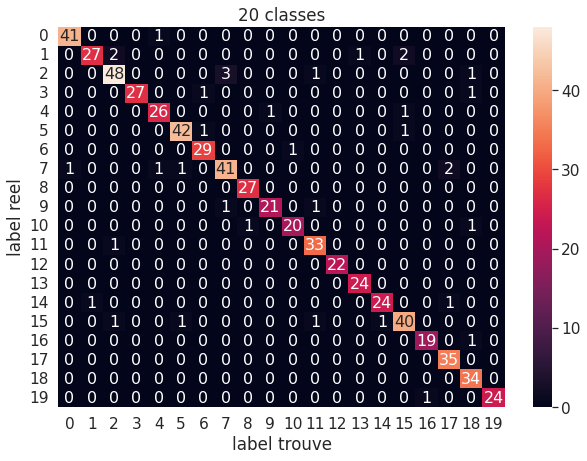

In [23]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
m=confusion_matrix(y_test_cat,y_pred)


df_cm = pd.DataFrame(m, range(20), range(20))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title("20 classes")
plt.ylabel("label reel")
plt.xlabel("label trouve")
# plt.savefig('/home/xeowhyx/projet/vgg19_adam001.png')

In [80]:
# y_test_cat
g9=np.where(y_test_cat==9)

In [48]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

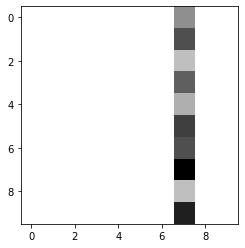

In [52]:
import sklearn
conf = sklearn.metrics.confusion_matrix(y_test_cat, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [50]:
print(y_test_cat[:10])
print(y_pred[:10])

[9 6 7 7 0 3 3 7 3 6]
[7 7 7 7 7 7 7 7 7 7]


In [33]:
rd=np.random.randint(x_train.shape[0], size=50)
for i in rd:
    # print(np.argmax(model.predict(x_train[i].reshape(1,224,224,3))))
    print(np.argmax(model.predict(x_train[i].reshape(1,224,224,3))))
    # print(i)

2
1
4
4
2
1
0
3
2
0
4
0
0
1
3
1
1
0
1
3
0
3
1
3
0
4
3
2
4
0
1
0
1
2
2
1
4
3
3
0
1
4
0
1
1
1
1
2
3
1


In [243]:
print(x_train.shape)
print(y_train.shape)

(367, 224, 224, 3)
(367, 10)


In [25]:
tmp='/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/tmp/'

# for cl in range(0,10):
#     aida=np.where(y_test==cl)
#     os.mkdir(tmp+str(cl))

#     for e,ele in enumerate(aida[0]):
#         a=x_test[aida[0][e]]
#         a=a*255
#         a=a.astype(np.uint8)
#         # plt.imshow(a)
#         # print(a.shape)
#         cv2.imwrite(tmp+str(cl)+'/'+str(e)+'.jpg', cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
#         # cv2.imwrite(tmp+str(e)+'.jpg', a)
    

for e,im in enumerate(x_train):
# for e,im in enumerate(x_test):
    # print(im.shape,im[0])
    im=im.reshape(1,224,224,3)
    vcoef=model.predict(im)
    pred=np.argmax(vcoef)

    im=im*255
    im=im.reshape(224,224,3)
    im=im.astype(np.uint8)
    cv2.imwrite(tmp+'/'+str(pred)+'/'+str(e)+'.jpg', cv2.cvtColor(im, cv2.COLOR_BGR2RGB))


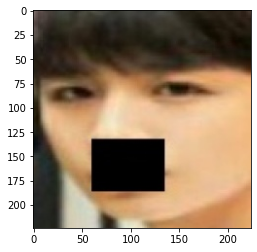

In [122]:
plt.imshow(im)

In [86]:
res=res.reshape(1, 224, 224, 3)

# model.predict(res)

In [94]:
# t=np.array([x_train[0]])
t.shape

(1, 224, 224, 3)

In [96]:
model.predict(np.array([x_train[0]]))
y[0]

0

In [28]:
# print(X[0].shape)
# hist.predict(x_train[0])
# score = model.evaluate(x_test, y_test, verbose=0)


# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('/media/xeowhyx/w10/Users/DAVID/dl/dataset_face/model/m1')
# model = keras.models.load_model('path/to/location')

# ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)

2022-02-20 09:12:53.516590: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /media/xeowhyx/w10/Users/DAVID/dl/dataset_face/model/m1/assets


In [153]:
classes

['aidai',
 'anhu',
 'axin',
 'baibaihe',
 'baijingting',
 'baike',
 'baobeier',
 'baojianfeng',
 'benxi',
 'caiguoqing']

In [7]:
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

2022-02-20 08:48:01.548368: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-20 08:48:01.575241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 08:48:01.580752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 08:48:01.581247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 980 Ti, pci bus id: 0000:2b:00.0, compute capability: 5.2



2022-02-20 08:48:02.014154: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 08:48:02.014447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 08:48:02.014692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 08:48:02.014919: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4895 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 980 Ti, pci bus id: 0000:2b:00.0, compute capability: 5.2
